# Homework 1
## Philip Nelson

In [8]:
%matplotlib widget 

# Imports
from matplotlib import pyplot as plt
import csv
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

# Data directory location
data_dir = "data/"

# 1 Getting familiar with Matplotlib

## 1.A

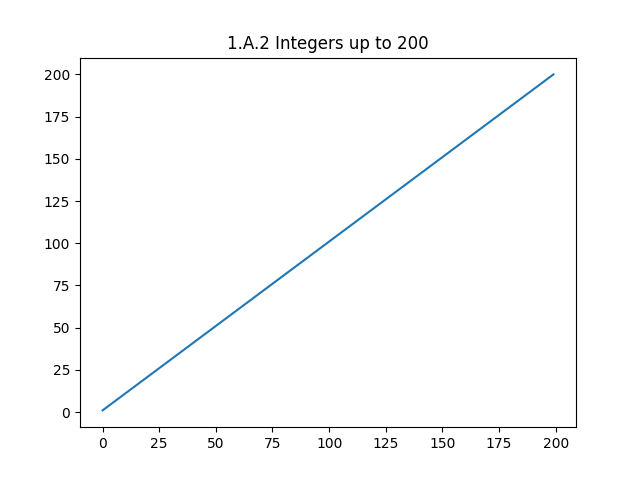

In [10]:
# 1.A.1
array = np.arange(1, 201)

# 1.A.2
plt.figure()
plt.plot(array)
plt.title("1.A.2 Integers up to 200")
plt.show()

## 1.B

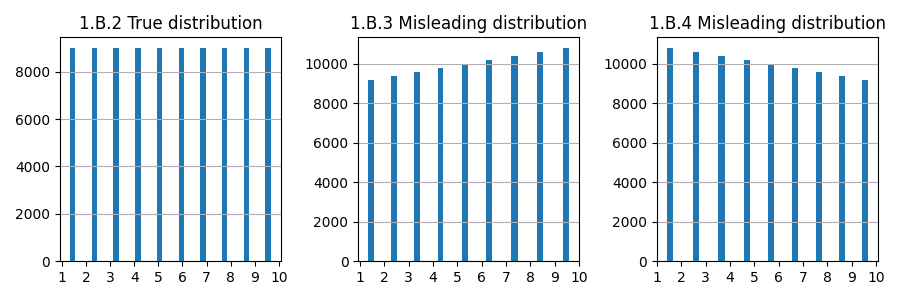

In [11]:
# 1.B.1
array = np.arange(1, 10, 1/10000)

# 1.B.2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.hist(array, bins=10, rwidth= 0.25)
ax1.set_xticks(np.arange(1, 11))
ax1.set_title("1.B.2 True distribution")
ax1.grid(visible=True, axis="y")

# 1.B.3
bins = [1]
for x in range(1,10):
    bins.append(bins[-1] + .9 + 0.02*x)
ax2.hist(array, bins=bins, rwidth=.25)
ax2.set_xticks(np.arange(1, 11))
ax2.set_title("1.B.3 Misleading distribution")
ax2.grid(visible=True, axis="y")

# 1.B.4
bins = [1]
for x in range(1,10):
    bins.append(bins[-1] + 1.1 - 0.02*x)
ax3.hist(array, bins=bins, rwidth=.25)
ax3.set_xticks(np.arange(1, 11))
ax3.set_title("1.B.4 Misleading distribution")
ax3.grid(visible=True, axis="y")

plt.tight_layout()
plt.show()

### 1.B.5
The second and third histograms are misleading. By manipulating the bin size, I was able to give the impression that the data was unevenly distributed when in reality the distribution was uniform

## 1.C

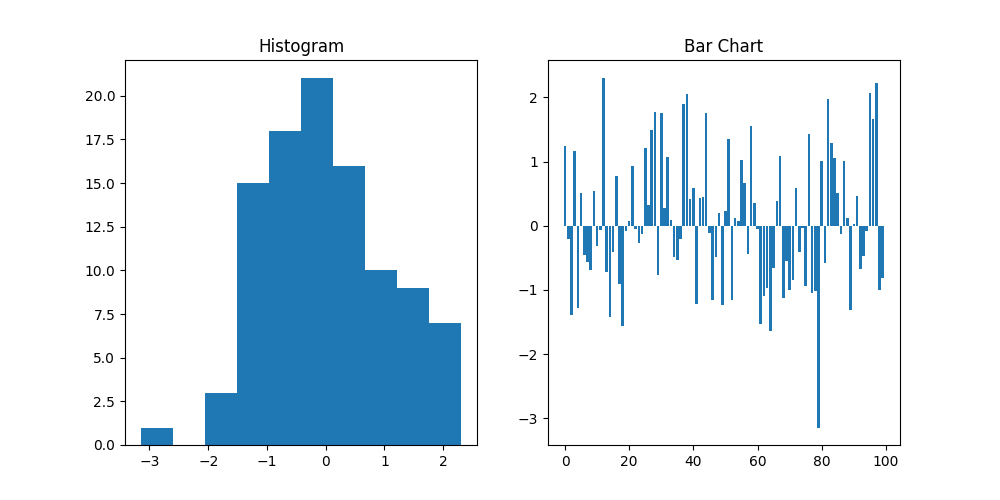

In [12]:
# 1.C.1
new_array = np.random.normal(size=100)

# 1.C.2
np.save("1.C.npy", new_array)
array = np.load("1.C.npy")

# 1.C.3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(array)
ax1.set_title("Histogram")

ax2.bar(np.arange(100), array)
ax2.set_title("Bar Chart")

plt.show()


### 1.C.4
The histogram shows the distribution of the values.

### 1.C.5
The bar chart shows the values in the order they occur in the array. Histograms lose this information during the binning process.

# 2 Interesting datasets for visualization

## 2.A NOAA Land Ocean Temperature Anomalies

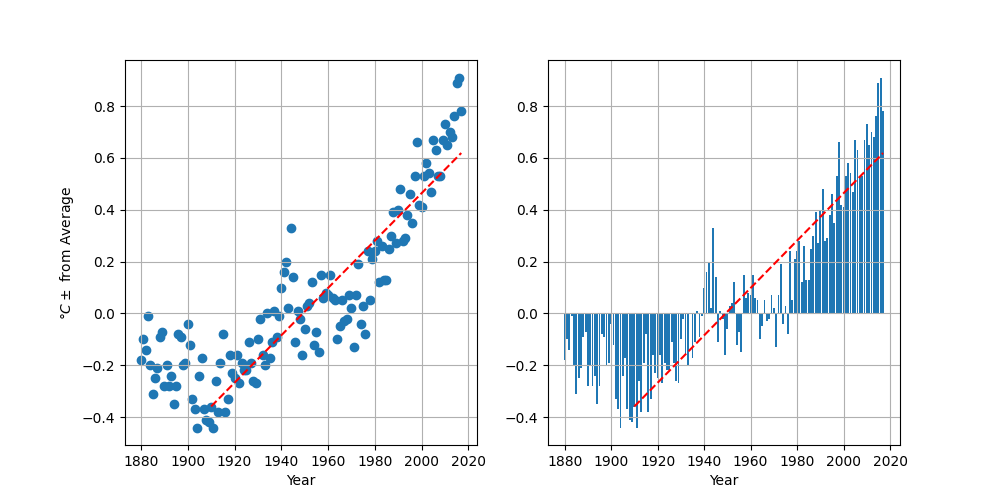

In [13]:
# 2.A.1
filename = data_dir+"NOAA-Temperatures.csv"
with open(filename) as f:
    temperature_data = csv.reader(f)
    for _ in range(5): next(temperature_data)
        
    years, temps = [list(tup) for tup in zip(*[(int(row[0]), float(row[1])) for row in temperature_data])]

    x = years[1910-1880:]
    y = temps[1910-1880:]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.scatter(years, temps)
    ax1.plot(x,p(x),"r--")
    ax1.set_xlabel("Year")
    ax1.set_ylabel(r"$\degree C \pm$ from Average")
    ax1.grid()
    
    ax2.bar(years, temps)
    ax2.plot(x,p(x),"r--")
    ax2.set_xlabel("Year")
    ax2.grid()

### 2.A.2
There is a positive trend toward warmer average temperatures.

### 2.A.3
I believe the scatter plot shows the trend better because it is less noisy. The bars extending to the x-axis are distracting to the trend. The scatter plot is especially superior when a trend line is drawn on the plot.

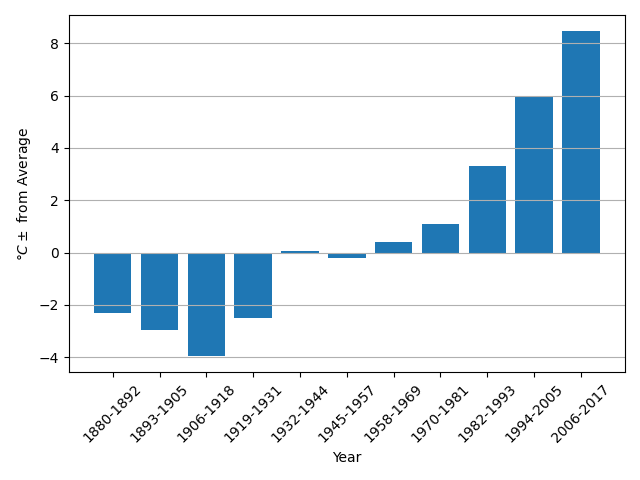

In [14]:
# 2.A.4
plt.figure()
nbins = 11
bins = [sum(x) for x in list(np.array_split(temps, nbins))]
labels = [f"{x[0]}-{x[-1]}" for x in list(np.array_split(years, nbins))]

plt.bar(labels, bins)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel(r"$\degree C \pm$ from Average")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 2.B Marriage

https://github.com/fivethirtyeight/data/tree/master/marriage

figures represent share of the relevant population that has never been married

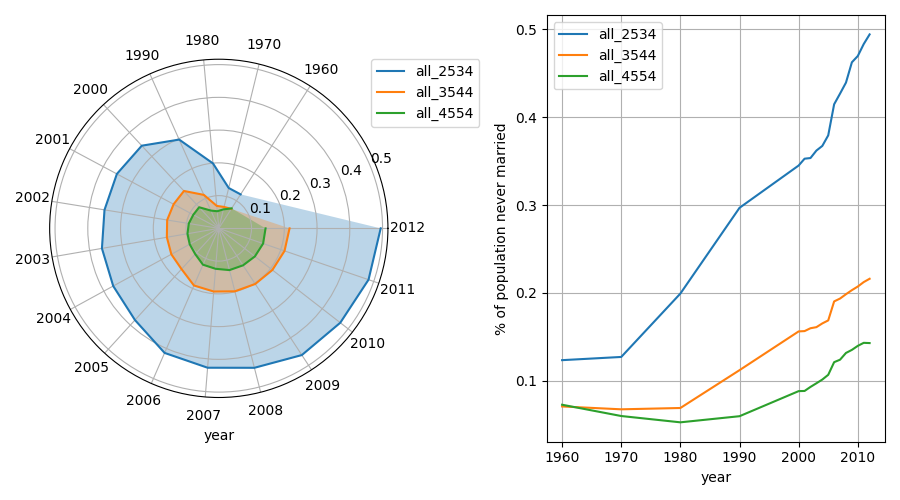

In [15]:
from math import pi

# 2.B.1
df = pd.read_csv(data_dir+"both_sexes.csv")

plt.subplots(1, 2, figsize=(9,5))

plt.subplot(121, polar=True)

ticks = np.linspace(1, 2*pi, len(df.year))
plt.xticks(ticks, df.year)

plt.polar(ticks, df.all_2534, label="all_2534")
plt.fill(ticks, df.all_2534, alpha=0.3)

plt.polar(ticks, df.all_3544, label="all_3544")
plt.fill(ticks, df.all_3544, alpha=0.3)

plt.polar(ticks, df.all_4554, label="all_4554")
plt.fill(ticks, df.all_4554, alpha=0.3)

plt.xlabel("year")
plt.legend(
    bbox_to_anchor=(.95, 1),
    loc='upper left',
    borderaxespad=0.
)

ax = plt.subplot(122)
for col in df.columns:
    if col.startswith("all"):
        sns.lineplot(data=df, x="year", y=col, label=col, ax=ax)
plt.ylabel("% of population never married")
plt.grid()
plt.tight_layout()
plt.show()

### 2.B.2
The trend I can see is a general increase, across all ages, of people not marrying. The trend is strongest with the youngest age group, 25-34.

### 2.B.3
For this application, I think the line plot is more effective at showing the increase of people not marying. The growing gap between 25-35 and 35-44 is easier to see in the line plot. It is hard to see that the age group 45-54 has changed at all in the polar plot.

## 2.C US Births
https://github.com/fivethirtyeight/data/tree/master/births

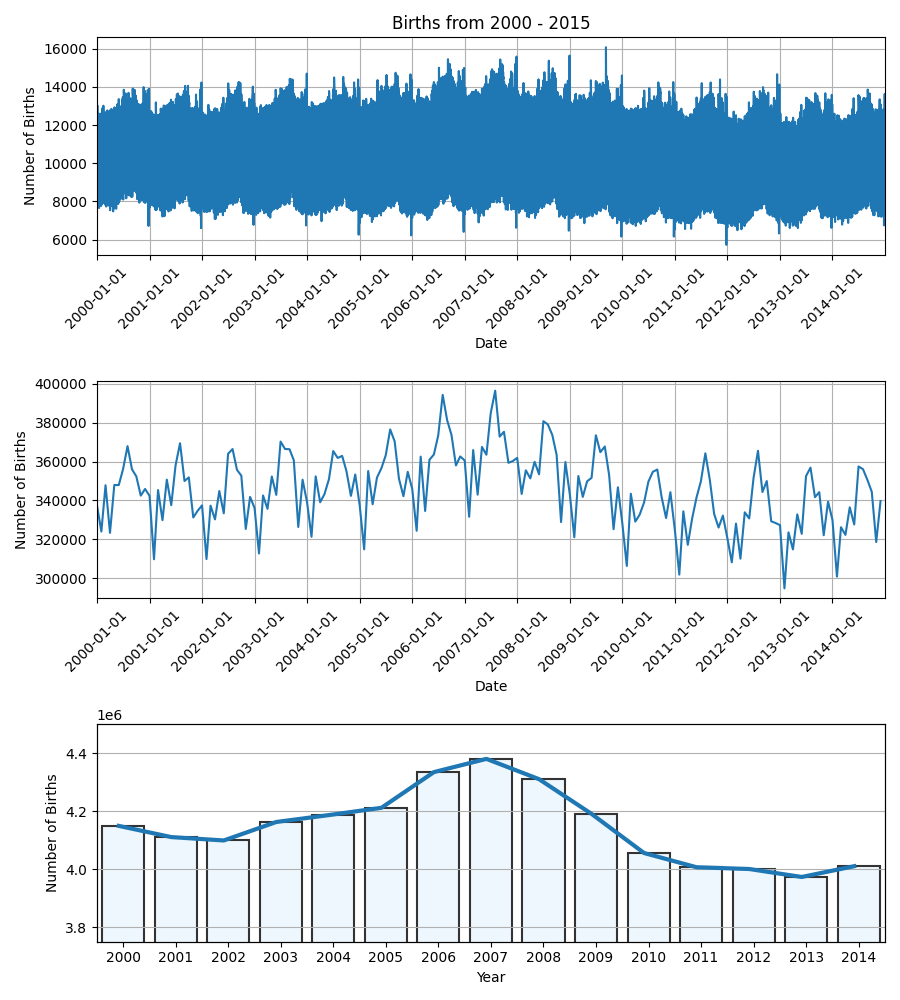

In [16]:
import datetime

df = pd.read_csv(data_dir+"US_births_2000-2014_SSA.csv")
df['date'] = df.apply(lambda row : datetime.date(row['year'], row['month'], row['date_of_month']), axis=1)

plt.figure(figsize=(9,10))
nrc = 310
ticks = list(map(lambda year : datetime.date(year, 1, 1), np.arange(2000, 2015)))
lims = (datetime.date(2000, 1, 1), datetime.date(2015, 1, 1))

plt.subplot(nrc+1)
plt.title("Births from 2000 - 2015")
sns.lineplot(data=df, x='date',  y='births')
plt.xticks(ticks, rotation=45)
plt.xlim(lims)
plt.xlabel("Date")
plt.ylabel("Number of Births")
plt.grid()

births = df.groupby(['year', 'month'], as_index=False)['births'].sum()
yearly_min = births.groupby(['year'], as_index=False)['births'].min()
births['births_adj'] = births.apply(
    lambda row : row['births'] - yearly_min[yearly_min['year'] == row['year']]['births'].iloc[0], axis=1)
births['date'] = births.apply(lambda row : datetime.date(row['year'], row['month'], 1), axis=1)
plt.subplot(nrc+2)
sns.lineplot(data=births, x='date', y='births')
# sns.lineplot(data=births, x='date', y='births_adj')
plt.xticks(ticks, rotation=45)
plt.xlim(lims)
plt.xlabel("Date")
plt.ylabel("Number of Births")
plt.grid()

births = df.groupby(['year'], as_index=False)['births'].sum()
births['date'] = births.apply(lambda row : datetime.date(row['year'], 6, 1), axis=1)
plt.subplot(nrc+3)

sns.barplot(data=births, x="year", y='births',
            linewidth=1.5, color="#ebf8ff", edgecolor=".2")
plt.ylim(3.75e6, 4.5e6)
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.grid(axis='y')

ax = plt.twiny()

sns.lineplot(data=births, x='date', y='births', linewidth=3)
plt.xticks([])
plt.xlim(lims)
plt.xlabel("")
plt.grid()
plt.tight_layout()
plt.show()

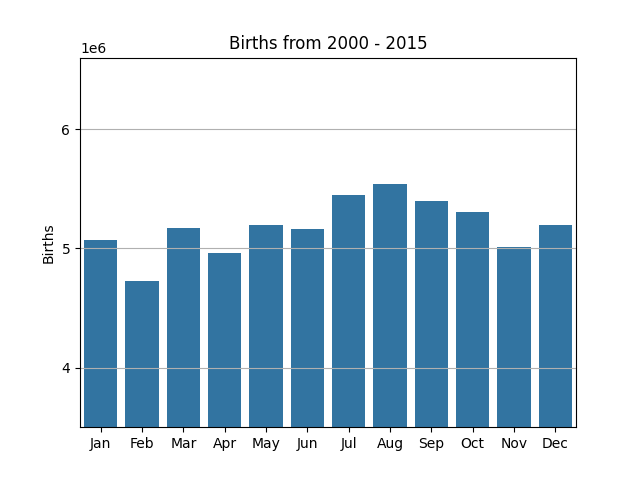

In [17]:

births_by_month = df[['month', 'births']].groupby("month").sum()
plt.figure()
sns.barplot(data=births_by_month, x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], y='births', color='#1f77b4')
plt.yticks(np.arange(4e6, 6.5e6, 1e6))
plt.ylim(3.5e6, 6.6e6)
plt.title("Births from 2000 - 2015")
plt.ylabel('Births')
plt.grid(axis='y')
plt.show()

In [18]:
births = df.groupby(['year', 'month'], as_index=False)['births'].sum()
highest = births.iloc[births["births"].idxmax()][["year", "month"]]
lowest = births.iloc[births["births"].idxmin()][["year", "month"]]
print("Month with highest births:", highest["year"], highest["month"])
print("Month with lowest births:", lowest["year"], lowest["month"])

Month with highest births: 2007 8
Month with lowest births: 2013 2


### 2.C.1
The month with the highest births was August 2007. If we add all the years together, August is still the month with the highest births.

### 2.C.2
The month with the lowest births was February 2013. If we add all the years together, February is still the month with the lowest births.

### 2.C.3
Looking at the line plot of the data, there is a periodic trend each year but it is hard to see. To clean up the plot I added all the births for each month and plotted them. This made the trend clearly visible. Each year, there is a peak in the births in the summer and a valley in the winter. This cycle repeats each year.

While looking at this plot, another trend started to be visible. To more clearly see this larger trend, I added all the births for each year and plotted them. There was a clear trend of increasing births until 2017, then a decrease through 2013.

## 2.D 

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congress-terms.csv")

In [20]:
# df = pd.read_csv(data_dir+"congress-terms.csv")
# sns.lineplot(data=df,)
df['birthday'] = df['birthday'].apply(lambda x : np.datetime64(x))
df['termstart'] = df['termstart'].apply(lambda x : np.datetime64(x))
df['incumbent'] = df['incumbent'].apply(lambda x : x == "Yes")
# print(df.head())
# print(df.dtypes)


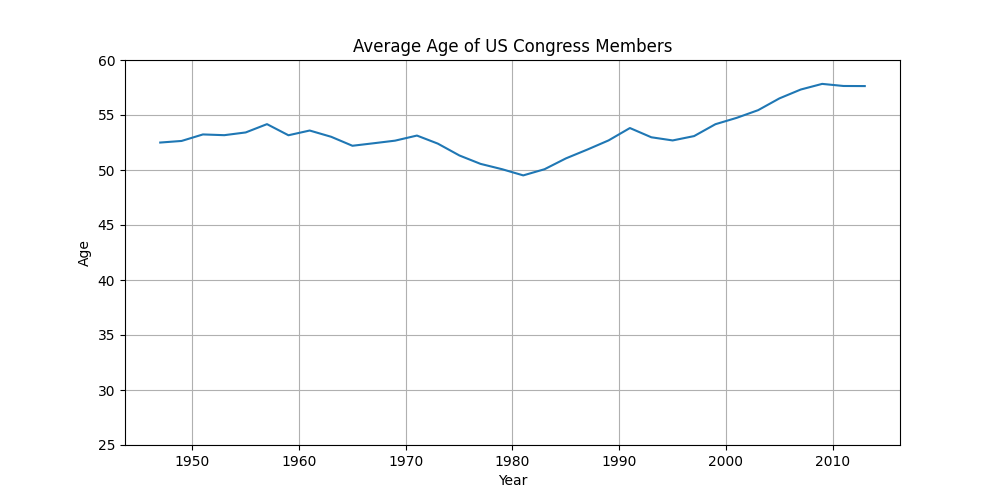

In [21]:

age = df.groupby('termstart')['age'].mean().reset_index(name="avg")
age['max'] = df.groupby(['termstart'], as_index=False)['age'].max()['age']
age['min'] = df.groupby(['termstart'], as_index=False)['age'].min()['age']
age['med'] = df.groupby(['termstart'], as_index=False)['age'].median()['age']
age['gap'] = age['max'] - age['min']
plt.figure(figsize=(10, 5))
# sns.lineplot(data=age, x='termstart', y='max', label='oldest')
# sns.lineplot(data=age, x='termstart', y='gap', label='age gap')
# sns.lineplot(data=age, x='termstart', y='med', label='median')
sns.lineplot(data=age, x='termstart', y='avg') #, label='average age')
# sns.lineplot(data=age, x='termstart', y='min', label='youngest')
plt.ylim(25, 60)
# plt.legend(
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left',
#     borderaxespad=0.
# )
plt.ylabel('Age')
plt.xlabel('Year')
plt.title('Average Age of US Congress Members')

plt.grid()
plt.show()



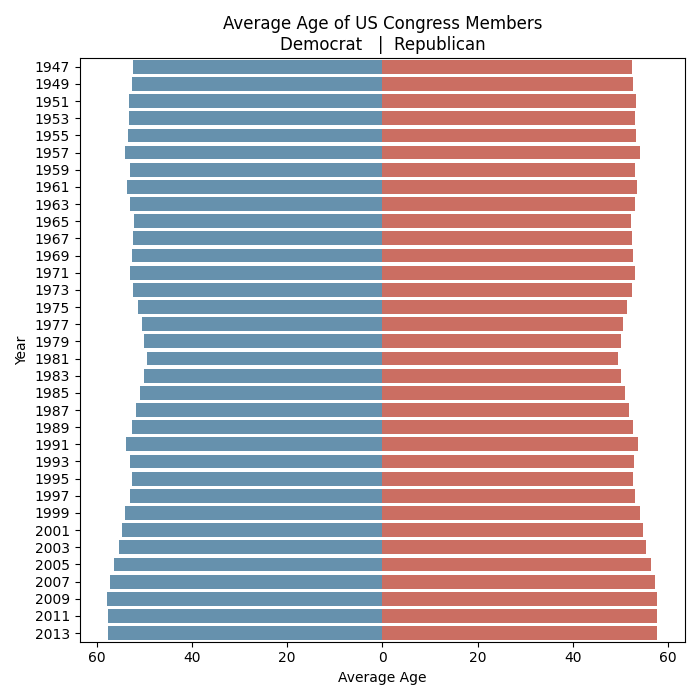

In [22]:
from matplotlib import ticker
plt.figure(figsize=(7,7))
ages = df[df.party == 'R'].groupby('termstart')['age'].apply(list).reset_index(name="ages")
ages['avg'] = df.groupby('termstart')['age'].mean().reset_index(name="avg")['avg']
sns.barplot(data=ages, x='avg', y='termstart', color='#dd6150')

ages = df[df.party == 'D'].groupby('termstart')['age'].apply(list).reset_index(name="ages")
ages['avg'] = df.groupby('termstart')['age'].mean().reset_index(name="avg")['avg']
ages['avg'] = -ages['avg']

ax = sns.barplot(data=ages, x='avg', y='termstart', color='#5a94b9')
ylabels = list(df['termstart'].dt.strftime('%Y').sort_values().unique())
ax.set_yticklabels(ylabels)
positions = [-60, -40, -20, 0, 20, 40, 60]
labels = ['60', '40', '20', '0', '20', '40', '60']
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

plt.title('Average Age of US Congress Members\nDemocrat   |  Republican')
plt.xlabel('Average Age')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [23]:
from scipy.stats.kde import gaussian_kde
def ridgeline(data, overlap=0, fill=None, labels=None, xlims=None, trim=False, n_points=150):
    """ Create a ridgeline plot
    Modified from: https://glowingpython.blogspot.com/2020/03/ridgeline-plots-in-pure-matplotlib.html

    Args:
        data ([[Number]]): Lists of data
        overlap (float, optional): Overlap of distribution plots. 1 max overlap, 0 no overlap. Defaults to 0.
        fill ([color], color, optional): Color(s) to fill the distributions. Defaults to None.
        labels ([string], [Number], optional): Labels to place on the y axis to describe each distribution. Defaults to None.
        xlims ((Number, Number), optional): Minimum and maximum x value. Defaults to None.
        trim (bool): Trim the tails of the distribution to the range of the data. Defaults to None. Defaults to False
        n_points (int, optional): Number of points to evaluate on each distribution function. Defaults to 150.

    Raises:
        ValueError: [description]
    """
    if overlap > 1 or overlap < 0:
        raise ValueError('overlap must be in [0 1]')

    if xlims is None:
        xlims = (np.min(np.concatenate(data)), np.max(np.concatenate(data)))

    xx = np.linspace(xlims[0], xlims[1], n_points)
    ys = []

    for i, d in enumerate(data):
        if trim:
            xx = np.linspace(np.min(d), np.max(d), n_points)

        pdf = gaussian_kde(d)
        y = i*(1.0-overlap)
        ys.append(y)
        curve = pdf(xx)

        color = None
        if isinstance(fill, list):
            color = fill[i]
        elif fill is not None:
            color = fill

        if color is not None:
            plt.fill_between(xx, np.ones(n_points)*y, 
                             curve+y, zorder=len(data)-i+1, color=color)

        plt.plot(xx, curve+y, c='k', zorder=len(data)-i+1)

    if labels:
        plt.yticks(ys, labels)

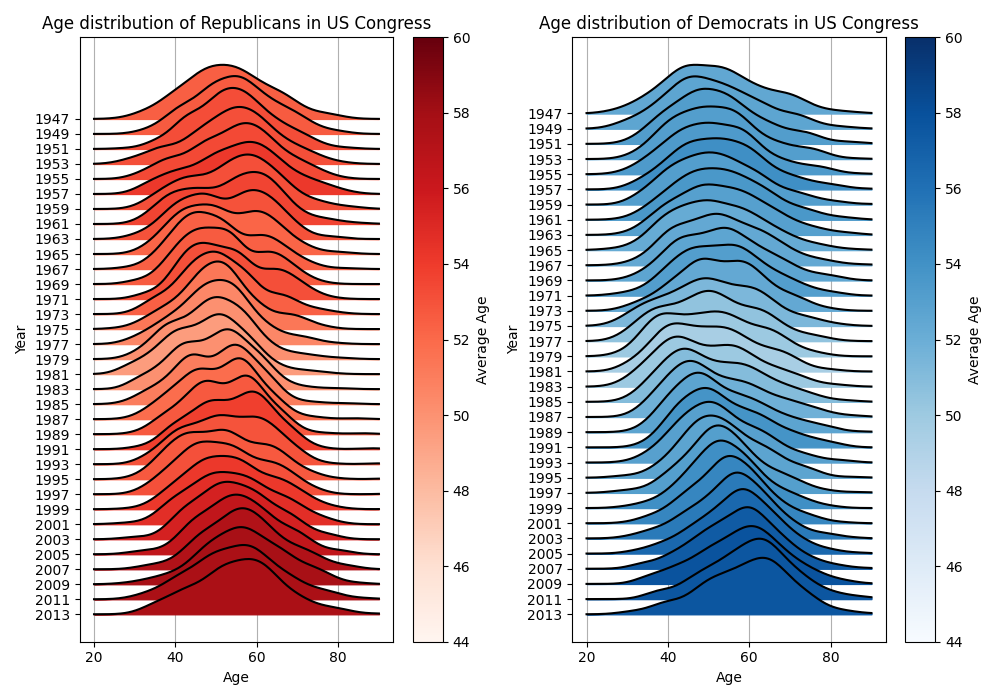

In [24]:
import math
import matplotlib as mpl

def plot_congress(ages, cmap, norm, reverse=False):

    fill = list(ages.apply(lambda x: cmap(norm(x['avg'])), axis=1))
    data = list(ages.ages)
    years = list(map(lambda x: x.year, list(ages['termstart'])))
    if reverse:
        fill.reverse()
        data.reverse()
        years.reverse()

    ridgeline(data, overlap=.990, labels=years, xlims=(20,90), fill=fill)
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap)).ax.set_ylabel("Average Age")
    plt.grid(axis="x")

##########################################################################################

# print(date.astype('datetime64[Y]'))
ages = df.groupby('termstart')['age'].apply(list).reset_index(name="ages")
ages['avg'] = df.groupby('termstart')['age'].mean().reset_index(name="avg")['avg']
lo = math.floor(ages.avg.min()) - 5
hi = math.ceil(ages.avg.max()) + 2
norm = mpl.colors.Normalize(vmin=lo, vmax=hi)

nrows = 1
ncols = 2
n = 0
plt.figure(figsize=(5*ncols,7*nrows))

# n = n+1
# plt.subplot(nrows, ncols, n)
# plot_congress(ages, plt.get_cmap('Greens'), norm, True)
# plt.title("Age distribution of US Congress")

ages = df[df.party == 'R'].groupby('termstart')['age'].apply(list).reset_index(name="ages")
ages['avg'] = df.groupby('termstart')['age'].mean().reset_index(name="avg")['avg']
n = n+1
plt.subplot(nrows, ncols, n)
plot_congress(ages, plt.get_cmap('Reds'), norm, True)
plt.title("Age distribution of Republicans in US Congress")
plt.xlabel("Age")
plt.ylabel("Year")

ages = df[df.party == 'D'].groupby('termstart')['age'].apply(list).reset_index(name="ages")
ages['avg'] = df.groupby('termstart')['age'].mean().reset_index(name="avg")['avg']
n = n+1
plt.subplot(nrows, ncols, n)
plot_congress(ages, plt.get_cmap('Blues'), norm, True)
plt.title("Age distribution of Democrats in US Congress")
plt.xlabel("Age")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

### 2.D.1

My hypothesis was that the age of the US congress members has been increasing recently. In the news and amongst friends, I have heard complaints about how old members of congress are and I thought this was a recent change. However, when looking at the data, I found that the average age has increased but has not durastically.

Three types of plots helped me understand this trend: line, age-party pyramid, and ridgeline plot. Each one had it's strengths and provided different insights. The lineplot of average age was the first to show that average age has not increased durastically but it provided no insigt into the distribution. Next, the age-party pyramid was helpful in looking at the average age of the two parties; however, I was also interested in seeing the age distribution within each year. The last plot, the rideline plot, showed the age distribution within each year in a readable way by overlapping the distributions. I was also able to add color to the rideline plot to highlight the change in average age over time.

An interesting trend in the age distribution appears in the republicans members between 1979 and 1991 where a bimodal distribution visible. It is interesting that the bimodality does not occur in the democrats. Both republicans and democrats have a trend of increasing age starting around 1980. This data does not cover the most recent years, I would be very interested to know if the trend has continued.

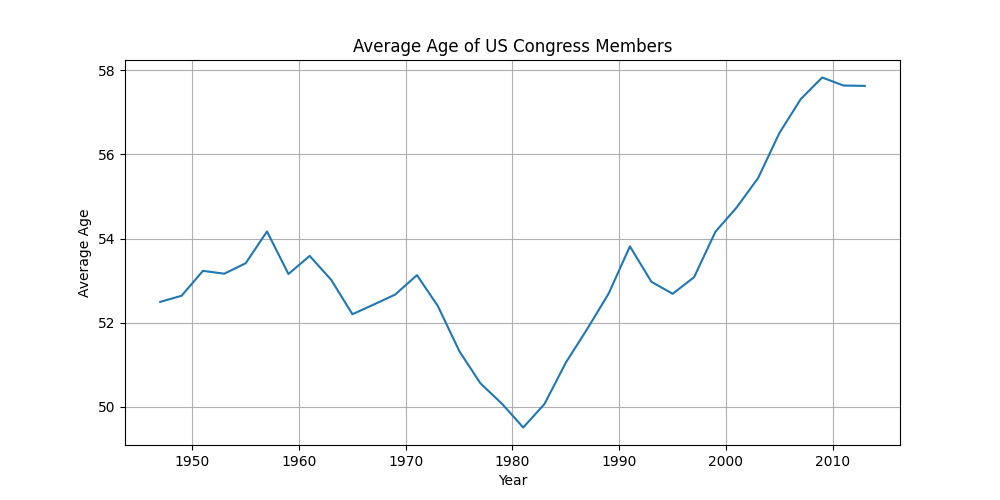

In [27]:
plt.figure(figsize=(10, 5))
age = df.groupby('termstart')['age'].mean().reset_index(name="avg")
age['max'] = df.groupby(['termstart'], as_index=False)['age'].max()['age']
age['min'] = df.groupby(['termstart'], as_index=False)['age'].min()['age']
age['gap'] = age['max'] - age['min']
sns.lineplot(data=age, x='termstart', y='avg')
# plt.legend(
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left',
#     borderaxespad=0.
# )
plt.title('Average Age of US Congress Members')
plt.ylabel('Average Age')
plt.xlabel('Year')
plt.grid()
plt.show()

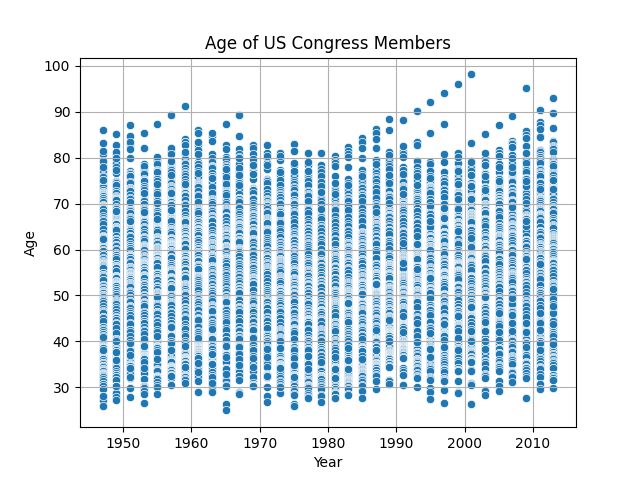

In [28]:
plt.figure()
sns.scatterplot(data=df, x='termstart', y='age')
plt.title('Age of US Congress Members')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid()
plt.show()

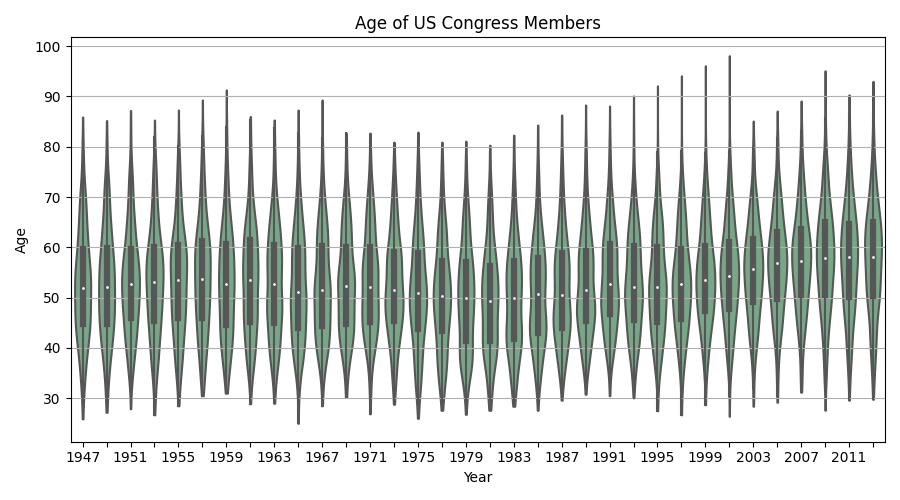

In [29]:
plt.figure(figsize=(9, 5))
ax = sns.violinplot(data=df, x="termstart", y="age", cut=0, color="#70AF85")
xlabels = list(df['termstart'].dt.strftime('%Y').sort_values().unique())
xlabels = [l if i%2 is 0 else "" for i,l in enumerate(xlabels)]
ax.set_xticklabels(xlabels, rotation=0)
ax.set_yticks(np.arange(30, 101, 10))
plt.xlabel("Year")
plt.ylabel("Age")
plt.title("Age of US Congress Members")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 2.D.2

These visualizations are not suitable for this dataset. The lineplot is the same one I used in the previous section but it mislead me at first. These were the default y limits and they create the false sense that the average age of US congress members has dramatically increased. When the y limits are set to include lower ages, then the true trend is shown.

The second visualization is the scatterplot. There are too many points in each year to be meaningfull and so the plot ends up being a noisy, messy block of points.

The final visualization is the violin plot. I origionally used this plot to try to see the age distribution each year, but there are too many years to visualize and the violins get squished to the point that the distribution information is lost. This issue was fixed with the overlap in the ridgeline plot.

# 3 Introduction to 3D scalar field datasets

In [30]:
# 3.A.1
data = np.fromfile(data_dir+"T2.raw", dtype='float32').reshape(320, 320, 256)

# 3.A.2
plt.imsave('3.A.2.png', data[100,:,:])

In [31]:
# 3.B
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.figure()

am = dict(x=0,y=1,z=2)
def update_slice_max(slice):
    slice_widget.max=data.shape[am[slice]]-1

def show(axis, slice, threshold):
    update_slice_max(axis)
    slice = slice_widget.value

    if axis == 'x':
        d = data[slice,:,:].copy()
    elif axis == 'y':
        d = data[:,slice,:].copy()
    elif axis == 'z':
        d = data[:,:,slice].copy()
    d[d < threshold] = 0.0
    plt.imshow(d)
    if axis == 'y': plt.gca().invert_yaxis()
    plt.show()

axis_widget=widgets.Dropdown(
    options=['x', 'y', 'z'],
    value='x',
    description='Axis:'
)
slice_widget = widgets.IntSlider(min=0, max=320, step=1, value=170)
thresh_widget = widgets.IntSlider(min=0, max=data.max(), step=1, value=138)
interact(show, slice=slice_widget, threshold=thresh_widget, axis=axis_widget)


interactive(children=(Dropdown(description='Axis:', options=('x', 'y', 'z'), value='x'), IntSlider(value=170, …

<function __main__.show(axis, slice, threshold)>

### 3.C.1
The topological dimensionality of this dataset is 3 dimensional

### 3.C.2
The geometrical dimensionality of the visualization in B is 2 dimensional

# 4 The Value of Visualization

### 4.A.1
Assessing value of visualizations is important because data visualization gives important insights into the large amount of data we have access to. Visualization provides insight not only to researchers and domain experts but to the lay person too. As methods are evaluated and improved, it is important to be able to compare them so that the best methods can be used. Data visualizations are used to make important decisions and have a good visualization can be the difference between making an informed or misinfomed decision.

### 4.A.2
Two measures for deciding the value of visualizations are profitability and efficiency.

## 4.B
The mathematical model for the visualization block shown in Fig.1 shows that data is transformed by a visualization by applying the visualization specification to the data. The result of this transformation is an image, or generally any kind of animation, or auditory or haptic feedback. This is perceived by the user which perception increases their knowledge. The perception, and therefore the rate of change of knowledge is related to the user's current knowledge at the time of perception. The perception of the visualization result leads the user to explore interactively which in turn leads to modifications to the visualization specification.

<!--
D - Data
S - Specification: hardware, algorithm, parameters
t - time
I - Image: any output of the visualization
V - Visualization
K - Knowledge: the increase in knowledge as a result of I
P - Perception: the perception and cognition of the observer
E - Exploration: interactive exploration
-->

## 4.C
The four parameters that describe the costs associated with any visualization technique are
* Initial development costs
* Initial costs per user
* Initial costs per session
* Perception and exploration costs

## 4.D
The pros of interactivity of visualizations are that interaction can improve the perception of the data. The data might not fit comfortably on screen or may be highly dimensional and so a single image will not adequately convey the desired information. Interactivify also enables developers to explore a larger set of the solution space, leading to new discoveries about the data.

The cons of interactivity of visualizations are that interacting with the visualization can lead to the user being subjective. They might be able to manipulate the visualization so that their opinions are supported in a misleading way. Too much customization can also be costly to develop for the developer and costly to consume for the user.